In [1]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import sklearn
import wordcloud

In [4]:
#machine Learning Process
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud

In [5]:
#read csv file 

In [6]:
data_set = pd.read_csv("C:/Users/DELL/Downloads/machine_learning_dataset/data.csv/data.csv",encoding='unicode_escape')
data_set

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [7]:
data_set.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

<Axes: >

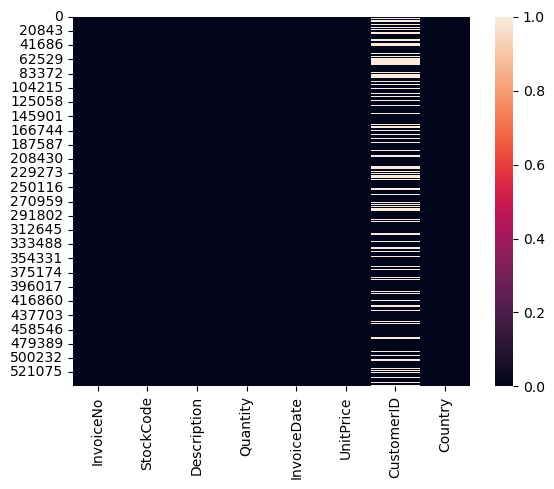

In [9]:
sns.heatmap(data_set.isnull())

In [10]:
data_set.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [11]:
#to convert data types
data_set['InvoiceDate'] = pd.to_datetime(data_set['InvoiceDate'])

In [12]:
data_set.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [9]:
data =data_set.dropna()

In [14]:
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

<Axes: >

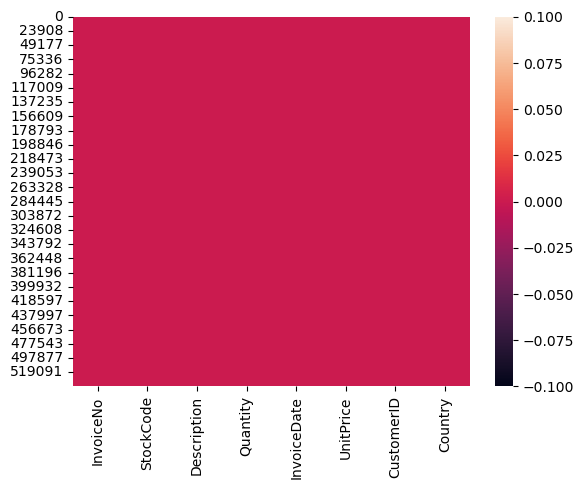

In [15]:
sns.heatmap(data.isnull())

In [16]:
data.describe

<bound method NDFrame.describe of        InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  Cu

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [18]:
data['UnitPrice'].describe()

count    406829.000000
mean          3.460471
std          69.315162
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max       38970.000000
Name: UnitPrice, dtype: float64

In [19]:
data['Description'].describe()

count                                 406829
unique                                  3896
top       WHITE HANGING HEART T-LIGHT HOLDER
freq                                    2070
Name: Description, dtype: object

In [20]:
data['Country'].describe()

count             406829
unique                37
top       United Kingdom
freq              361878
Name: Country, dtype: object

In [21]:
data['InvoiceDate'].describe()

count                           406829
mean     2011-07-10 16:30:57.879207424
min                2010-12-01 08:26:00
25%                2011-04-06 15:02:00
50%                2011-07-31 11:48:00
75%                2011-10-20 13:06:00
max                2011-12-09 12:50:00
Name: InvoiceDate, dtype: object

In [10]:
pd.DataFrame([{'Product':len(data['StockCode'].value_counts()),
               'Number_customer': len(data['CustomerID'].value_counts()),
               'Transactions': len(data['Quantity'].value_counts())}],index = ['quantity'])

,Product,Number_customer,Transactions
quantity,3684,4372,436


In [11]:
#number of product buy coustmer 
pd.DataFrame({'customers_ID':data['CustomerID'],
             'Invoice':data['InvoiceNo'],
             'ProductBuy':data['Quantity']})

,customers_ID,Invoice,ProductBuy
0,17850.0,536365,6
1,17850.0,536365,6
2,17850.0,536365,8
3,17850.0,536365,6
4,17850.0,536365,6
...,...,...,...
541904,12680.0,581587,12
541905,12680.0,581587,6
541906,12680.0,581587,4
541907,12680.0,581587,4


In [12]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [25]:
word_colud = WordCloud(width=800, height=800, background_color='white').generate(' '.join(data['Description']))

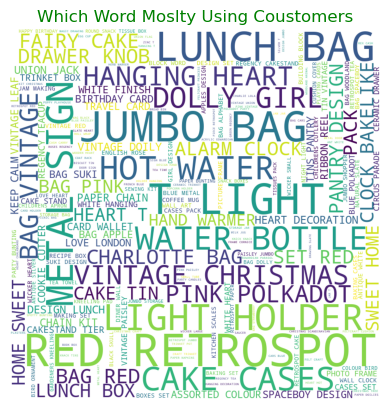

In [26]:
plt.imshow(word_colud)
plt.axis(False)
plt.title('Which Word Moslty Using Coustomers', color ='green')
plt.show()

In [13]:
CN_unique = data['Country']
unique_list = list(dict.fromkeys(CN_unique))
unique_list 

['United Kingdom',
 'France',
 'Australia',
 'Netherlands',
 'Germany',
 'Norway',
 'EIRE',
 'Switzerland',
 'Spain',
 'Poland',
 'Portugal',
 'Italy',
 'Belgium',
 'Lithuania',
 'Japan',
 'Iceland',
 'Channel Islands',
 'Denmark',
 'Cyprus',
 'Sweden',
 'Austria',
 'Israel',
 'Finland',
 'Greece',
 'Singapore',
 'Lebanon',
 'United Arab Emirates',
 'Saudi Arabia',
 'Czech Republic',
 'Canada',
 'Unspecified',
 'Brazil',
 'USA',
 'European Community',
 'Bahrain',
 'Malta',
 'RSA']

In [ ]:
sns.lineplot(unique_list)
plt.axis()

In [28]:
Total_amount = data['UnitPrice']

In [30]:
TT_am_country

406829

In [31]:
country = data['Country']
Price = data['UnitPrice']

In [32]:
all_1 =pd.DataFrame({
    'con':country,
    'Pri':Price
})

In [34]:
all_1.drop('con',inplace =True, axis =1)

In [14]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

data['country_encoder'] = labelencoder.fit_transform(data['Country'])

C:\Users\DELL\AppData\Local\Temp\ipykernel_14344\1230699850.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['country_encoder'] = labelencoder.fit_transform(data['Country'])


In [36]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,country_encoder
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,35
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,35
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,35
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,35
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,35
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,13
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,13
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,13
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,13


In [16]:
country_encoder =data['country_encoder']

In [82]:
CorrData =pd.DataFrame({
    'corr_country':country_encoder,
    'corr_Price':data['UnitPrice'],
    'corr_Quantity':data['Quantity'],
})

In [40]:
corre = CorrData.corr()

<Axes: >

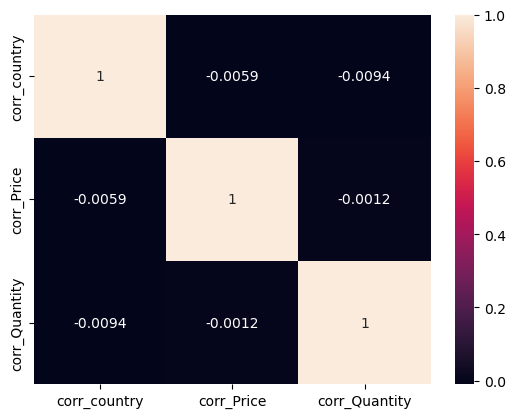

In [41]:
sns.heatmap(corre , annot =True)

In [17]:
data_country_wised=pd.DataFrame({'country':data['Country'],
                                 'price':data['UnitPrice'],
                                 'quantity':data['Quantity'],
                                 'date_range':data['InvoiceDate']})

In [18]:
UK = data_country_wised[data_country_wised['country']=='United Kingdom']


In [19]:
GE = data_country_wised[data_country_wised['country']=='Germany']
GE

,country,price,quantity,date_range
1109,Germany,2.95,6,12/1/2010 13:04
1110,Germany,2.55,6,12/1/2010 13:04
1111,Germany,0.85,12,12/1/2010 13:04
1112,Germany,1.65,12,12/1/2010 13:04
1113,Germany,1.95,12,12/1/2010 13:04
...,...,...,...,...
541801,Germany,1.25,12,12/9/2011 12:16
541802,Germany,0.85,12,12/9/2011 12:16
541803,Germany,0.85,12,12/9/2011 12:16
541804,Germany,2.08,12,12/9/2011 12:16


In [20]:
FR = data_country_wised[data_country_wised['country']=='France']

In [21]:
EI = data_country_wised[data_country_wised['country']=='EIRE']

In [22]:
data_country_wised['country'].value_counts()

country
United Kingdom          361878
Germany                   9495
France                    8491
EIRE                      7485
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1480
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     250
Unspecified                244
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon                     45


In [23]:
all_time = data_country_wised['date_range'].describe()
all_time

count               406829
unique               20460
top       11/14/2011 15:27
freq                   543
Name: date_range, dtype: object

In [33]:
# fig =plt.figure(figsize =(50,50))

# sub1 = plt.subplot(2,2,1)
# sub2 = plt.subplot(2,2,2)
# sub3 = plt.subplot(2,2,3)
# sub4 = plt.subplot(2,2,4)

# sub1.lines(ukData,all_time)
# sub2.boxplot(geData,all_time)
# sub3.boxplot(frData,all_time)
# sub4.boxplot(eiData,all_time)

# sub1.set_xticks(list(range(0,10,1)))
# sub2.set_xticks(list(range(0,10,2)))
# sub3.set_xticks(list(range(0,10,3)))
# sub4.set_xticks(list(range(0,10,4)))
# a.empty

# plt.show()

In [ ]:

# for country in GE['country']:
#     country_data = GE
#     plt.plot(GE['date_range'], GE[GE['price',ascending=False.head(10)]
# for country in UK['country']:
#     country_data = UK
#     plt.plot(UK['date_range'], UK['price'])

# for country in EI['country']:
#     country_data = EI
#     plt.plot(EI['date_range'], EI['price'])
    
# for country in FR['country']:
#     country_data = FR
#     plt.plot(FR['date_range'], FR['price'])
# plt.title('Price Trends for Selected Countries')
# plt.xlabel('Date')
# plt.ylabel('Price')
# plt.show()

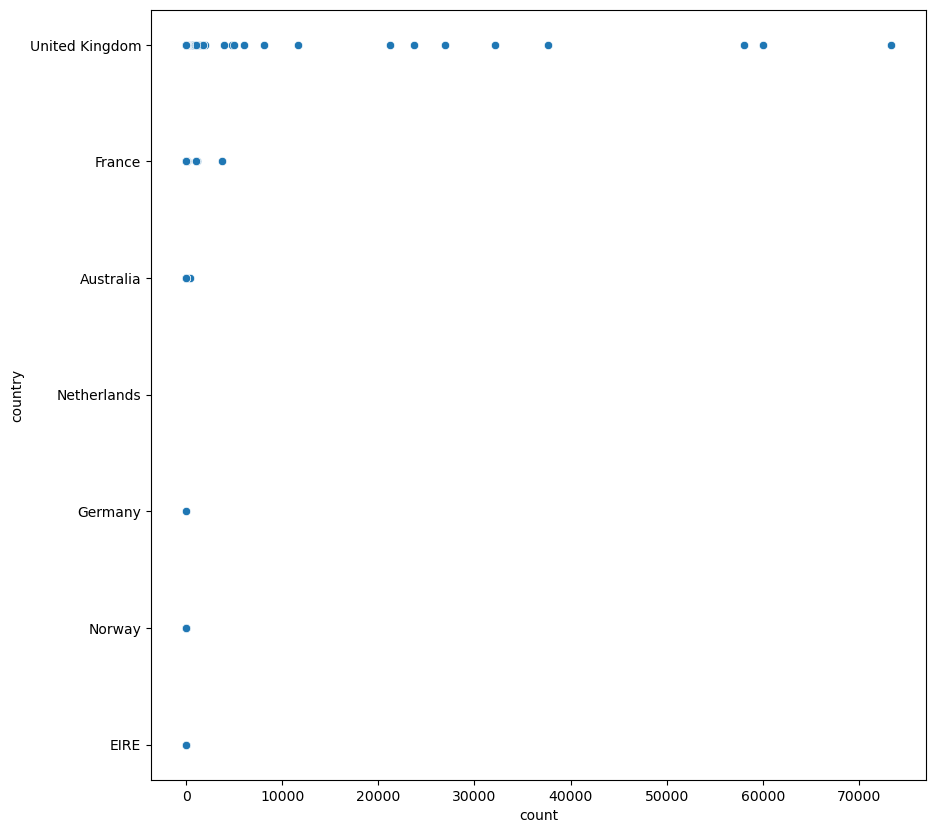

In [56]:
fig =plt.figure(figsize =(10,10))
sns.scatterplot(y=data_country_wised['country'],x=data_country_wised['quantity'].value_counts())
plt.show()

In [70]:
valuecount = data_country_wised['country'].value_counts().head(5)
valuecount

country
United Kingdom    361878
Germany             9495
France              8491
EIRE                7485
Spain               2533
Name: count, dtype: int64

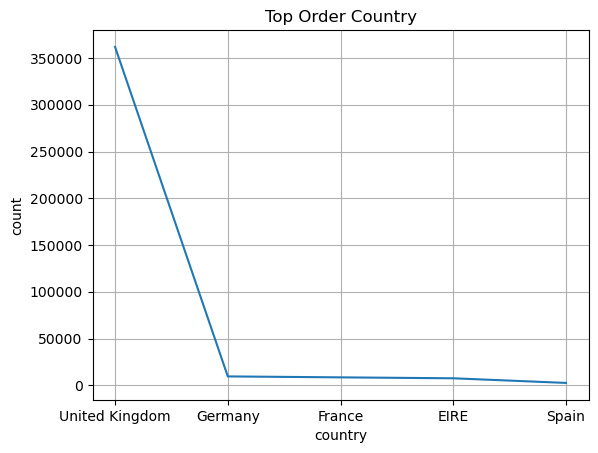

In [85]:
sns.lineplot(valuecount)
plt.title('Top Order Country')
plt.grid()
plt.show()